In [1]:
import sys
sys.path.append('/home/jovyan/workspace')

In [2]:
import numpy as np
from underworld import function as fn

from modelscripts import arrhenius
from planetengine import quickShow
import planetengine
from planetengine import functions

In [3]:
system = arrhenius.build(res = 16, Ra = 1e4, f = 0.5, aspect = 1., eta0 = 10.)
planetengine.initials.apply(
    {'temperatureField': planetengine.initials.sinusoidal.IC(freq = 1.)},
    system,
    )
system.solve()

In [4]:
base = functions.tidy.basetypes.variable(
    system.velocityField,
    varName = 'velocityField'
    )

shape = functions.tidy.basetypes.shape(
    np.array([[0.2, 0.1], [0.9, 0.3], [0.8, 0.7], [0.4, 0.9]]),
    varName = 'myshape'
    )

constant = functions.tidy.basetypes.constant(
    2.
    )

In [5]:
anVar = base
anVar = functions.tidy.simple.component.mag(anVar)
anVar = functions.tidy.simple.gradient.rad(anVar)
anVar = anVar ** constant
anVar = functions.tidy.simple.operations.abs(anVar)
anVar = functions.tidy.simple.region(shape, anVar)
anVar = functions.tidy.simple.quantile.quintile(anVar, nthtile = 1)
anVar = functions.tidy.utils.zeronan(anVar)
anVar = functions.tidy.utils.binarise(anVar)

In [6]:
newfig = planetengine.visualisation.QuickFig(anVar)

Fitted 1 variables to the figure.


Binarise{ZeroNaN{Quantile_nthtile=1_ntiles=5{Region{Operation_uwop=abs{Operation_uwop=pow{Gradient_gradient=rad{Component_component=mag{Variable_varName=velocityField{}}};Constant_val=arr{[ 2.]}{}}};Shape_varName=myshape{}}}}} [ 1.]



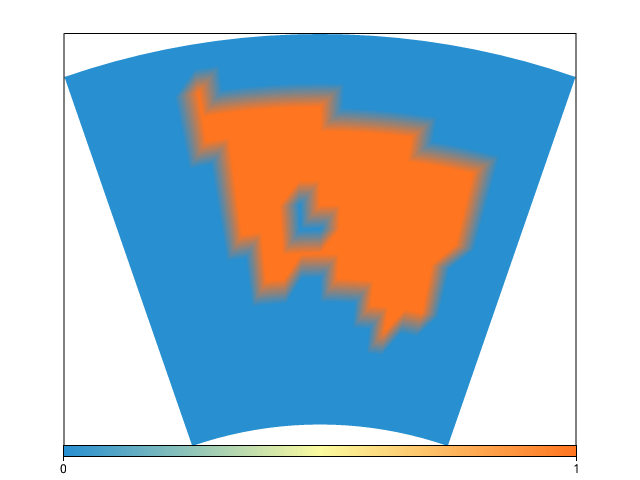

In [7]:
newfig.show()

Binarise{ZeroNaN{Quantile_nthtile=1_ntiles=5{Region{Operation_uwop=abs{Operation_uwop=pow{Gradient_gradient=rad{Component_component=mag{Variable_varName=velocityField{}}};Constant_val=arr{[ 2.]}{}}};Shape_varName=myshape{}}}}} [ 1.]



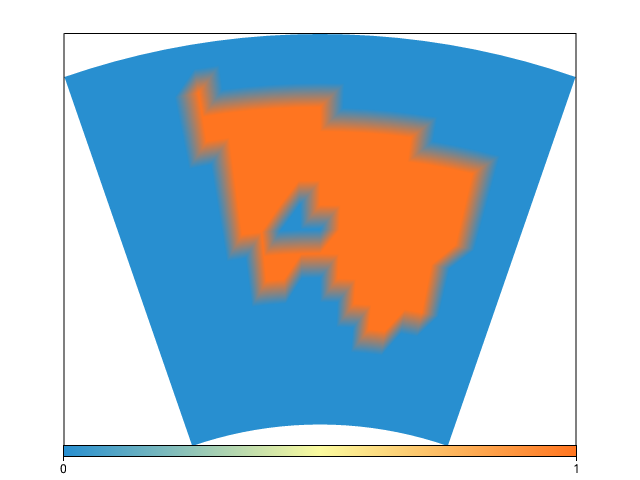

In [8]:
for i in range(20):
    system.iterate()
newfig.show()

Fitted 2 variables to the figure.
Operation_uwop=multiply{Binarise{ZeroNaN{Quantile_nthtile=1_ntiles=5{Region{Operation_uwop=abs{Operation_uwop=pow{Gradient_gradient=rad{Component_component=mag{Variable_varName=velocityField{}}};Constant_val=arr{[ 2.]}{}}};Shape_varName=myshape{}}}}};Variable_varName=anon{}} [ 25.0453854   26.33253856]
Variable_varName=anon{} [ 7.05335504]



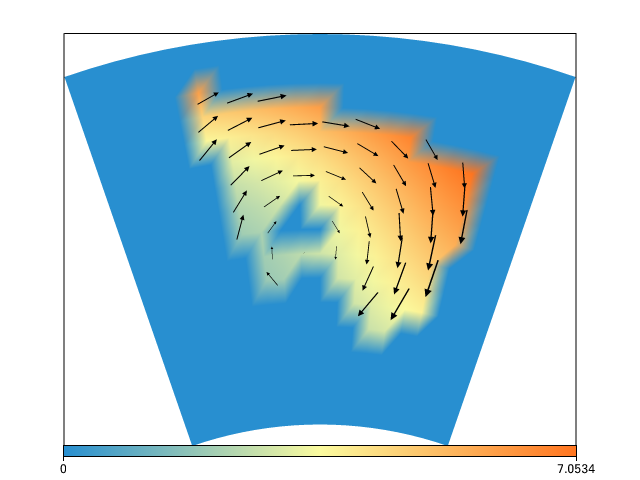

In [9]:
planetengine.quickShow(anVar * system.velocityField, system.viscosityFn * anVar)

In [10]:
anInt = functions.tidy.simple.integral.volume(anVar)

In [11]:
anInt = functions.tidy.simple.integral.volume(anVar)

In [12]:
from timeit import timeit

In [13]:
def testfn():
    system.iterate()
    for i in range(10):
        print(round(timeit(anInt.evaluate, number = 1), 4))
testfn()

1.1631
0.0109
0.0125
0.0138
0.0155
0.0138
0.0156
0.0141
0.0135
0.0165


In [14]:
newFn = anInt * system.temperatureField

Fitted 1 variables to the figure.
Operation_uwop=multiply{Integral_surface=volume{Binarise{ZeroNaN{Quantile_nthtile=1_ntiles=5{Region{Operation_uwop=abs{Operation_uwop=pow{Gradient_gradient=rad{Component_component=mag{Variable_varName=velocityField{}}};Constant_val=arr{[ 2.]}{}}};Shape_varName=myshape{}}}}}};Variable_varName=anon{}} [ 0.26898193]



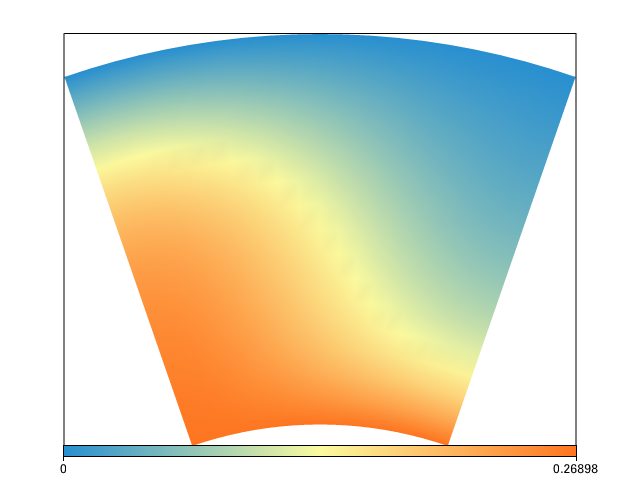

In [15]:
planetengine.quickShow(newFn)